<a href="https://colab.research.google.com/github/usshaa/HiveTech/blob/main/EV_Market_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EV Market Overview & Data Fundamentals
### Electric Vehicle Data Analytics Course

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ============================================================================
# SECTION 1: UNDERSTANDING EV ECOSYSTEM
# ============================================================================

In [71]:
# Key EV Metrics Dictionary
ev_metrics = {
    'Vehicle Metrics': [
        'Battery Capacity (kWh)',
        'Range (miles/km)',
        'Charging Speed (kW)',
        'Energy Efficiency (kWh/100km)',
        'Price ($)'
    ],
    'Market Metrics': [
        'Sales Volume',
        'Market Share (%)',
        'Adoption Rate',
        'Year-over-Year Growth',
        'Regional Penetration'
    ],
    'Infrastructure Metrics': [
        'Charging Stations Count',
        'Station Utilization Rate',
        'Average Charging Time',
        'Geographic Coverage',
        'Power Output Distribution'
    ],
    'Performance Metrics': [
        'Battery Degradation Rate',
        'Charging Efficiency',
        'Real-world vs EPA Range',
        'Temperature Impact',
        'Maintenance Costs'
    ]
}

In [72]:
# Display key metrics
for category, metrics in ev_metrics.items():
    print(f"\n{category}:")
    for metric in metrics:
        print(f"  • {metric}")


Vehicle Metrics:
  • Battery Capacity (kWh)
  • Range (miles/km)
  • Charging Speed (kW)
  • Energy Efficiency (kWh/100km)
  • Price ($)

Market Metrics:
  • Sales Volume
  • Market Share (%)
  • Adoption Rate
  • Year-over-Year Growth
  • Regional Penetration

Infrastructure Metrics:
  • Charging Stations Count
  • Station Utilization Rate
  • Average Charging Time
  • Geographic Coverage
  • Power Output Distribution

Performance Metrics:
  • Battery Degradation Rate
  • Charging Efficiency
  • Real-world vs EPA Range
  • Temperature Impact
  • Maintenance Costs


# ============================================================================
# SECTION 2: SYNTHETIC EV MARKET DATA GENERATION
# ============================================================================

In [74]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic EV market data
def generate_ev_market_data(n_records=1000):
    """Generate synthetic EV market data for analysis"""

    # Vehicle manufacturers and models
    manufacturers = ['Tesla', 'BMW', 'Audi', 'Nissan', 'Chevrolet', 'Ford', 'Volkswagen', 'Hyundai']
    models = {
        'Tesla': ['Model S', 'Model 3', 'Model X', 'Model Y'],
        'BMW': ['i3', 'i4', 'iX3', 'iX'],
        'Audi': ['e-tron', 'e-tron GT', 'Q4 e-tron'],
        'Nissan': ['Leaf', 'Ariya'],
        'Chevrolet': ['Bolt EV', 'Bolt EUV'],
        'Ford': ['Mustang Mach-E', 'F-150 Lightning'],
        'Volkswagen': ['ID.3', 'ID.4', 'ID.Buzz'],
        'Hyundai': ['Kona Electric', 'Ioniq 5', 'Ioniq 6']
    }

    # Generate data
    data = []
    for i in range(n_records):
        manufacturer = np.random.choice(manufacturers)
        model = np.random.choice(models[manufacturer])

        # Vehicle specifications based on manufacturer
        if manufacturer == 'Tesla':
            battery_capacity = np.random.normal(75, 15)
            price = np.random.normal(55000, 15000)
            range_miles = np.random.normal(320, 50)
        elif manufacturer in ['BMW', 'Audi']:
            battery_capacity = np.random.normal(65, 10)
            price = np.random.normal(65000, 20000)
            range_miles = np.random.normal(280, 40)
        else:
            battery_capacity = np.random.normal(60, 12)
            price = np.random.normal(35000, 10000)
            range_miles = np.random.normal(250, 35)

        # Generate other attributes
        data.append({
            'manufacturer': manufacturer,
            'model': model,
            'battery_capacity_kwh': max(30, battery_capacity),
            'price_usd': max(25000, price),
            'range_miles': max(150, range_miles),
            'charging_speed_kw': np.random.choice([7.4, 11, 22, 50, 150, 250]),
            'vehicle_type': np.random.choice(['Sedan', 'SUV', 'Hatchback', 'Truck'],
                                          p=[0.4, 0.3, 0.2, 0.1]),
            'market_segment': np.random.choice(['Luxury', 'Premium', 'Mass Market'],
                                            p=[0.3, 0.4, 0.3]),
            'year': np.random.choice(range(2020, 2025)),
            'region': np.random.choice(['North America', 'Europe', 'Asia-Pacific', 'Other'],
                                    p=[0.35, 0.35, 0.25, 0.05])
        })

    return pd.DataFrame(data)

In [75]:
# Generate the dataset
ev_data = generate_ev_market_data(1000)

In [76]:
# Calculate derived metrics
ev_data['efficiency_kwh_per_100mi'] = (ev_data['battery_capacity_kwh'] / ev_data['range_miles']) * 100
ev_data['price_per_mile_range'] = ev_data['price_usd'] / ev_data['range_miles']
ev_data['battery_cost_ratio'] = ev_data['battery_capacity_kwh'] / ev_data['price_usd'] * 1000

In [77]:
print(f"✅ Generated {len(ev_data)} EV records")
print(f"📅 Data spans years: {ev_data['year'].min()} - {ev_data['year'].max()}")
print(f"🏭 Manufacturers: {', '.join(ev_data['manufacturer'].unique())}")

✅ Generated 1000 EV records
📅 Data spans years: 2020 - 2024
🏭 Manufacturers: Volkswagen, BMW, Tesla, Hyundai, Chevrolet, Audi, Nissan, Ford


In [78]:
# Display basic info
print("\n📋 Dataset Overview:")
print(ev_data.info())


📋 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              1000 non-null   object 
 1   model                     1000 non-null   object 
 2   battery_capacity_kwh      1000 non-null   float64
 3   price_usd                 1000 non-null   float64
 4   range_miles               1000 non-null   float64
 5   charging_speed_kw         1000 non-null   float64
 6   vehicle_type              1000 non-null   object 
 7   market_segment            1000 non-null   object 
 8   year                      1000 non-null   int64  
 9   region                    1000 non-null   object 
 10  efficiency_kwh_per_100mi  1000 non-null   float64
 11  price_per_mile_range      1000 non-null   float64
 12  battery_cost_ratio        1000 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory u

In [80]:
print("\n📊 Sample Data:")
ev_data.head()


📊 Sample Data:


,manufacturer,model,battery_capacity_kwh,price_usd,range_miles,charging_speed_kw,vehicle_type,market_segment,year,region,efficiency_kwh_per_100mi,price_per_mile_range,battery_cost_ratio
0,Volkswagen,ID.3,66.524918,28845.702304,208.076775,22.0,SUV,Premium,2022,North America,31.971333,138.630091,2.306233
1,BMW,iX,86.416584,55610.512281,301.702402,50.0,Sedan,Premium,2024,Europe,28.642989,184.322405,1.553961
2,Tesla,Model X,59.807533,59713.709989,274.598796,250.0,Sedan,Premium,2023,Europe,21.779969,217.458018,1.001571
3,Hyundai,Kona Electric,43.052356,36222.191652,231.959752,150.0,SUV,Luxury,2020,Other,18.560270,156.157227,1.188563
4,BMW,i4,58.993613,59166.125004,255.931736,50.0,SUV,Luxury,2020,North America,23.050527,231.179322,0.997084


# ============================================================================
# SECTION 3: EXPLORATORY DATA ANALYSIS
# ============================================================================

In [82]:
# Basic statistics
print("📈 Statistical Summary:")
print(ev_data.describe())

📈 Statistical Summary:
       battery_capacity_kwh      price_usd  range_miles  charging_speed_kw  \
count           1000.000000    1000.000000  1000.000000        1000.000000   
mean              62.829137   45507.233878   267.629705          86.862200   
std               13.312964   17795.349180    44.464393          91.115576   
min               30.000000   25000.000000   150.000000           7.400000   
25%               53.978562   31727.847550   237.331094          11.000000   
50%               62.564480   41834.158477   264.862465          50.000000   
75%               71.553010   54249.348459   293.577920         150.000000   
max              115.963008  122684.645531   448.666248         250.000000   

              year  efficiency_kwh_per_100mi  price_per_mile_range  \
count  1000.000000               1000.000000           1000.000000   
mean   2022.028000                 23.967144            172.500788   
std       1.424516                  5.932115             68.4254

In [83]:
# Missing values check
print(f"\n❓ Missing Values: {ev_data.isnull().sum().sum()}")


❓ Missing Values: 0


# ============================================================================
# SECTION 4: EV MARKET VISUALIZATIONS
# ============================================================================

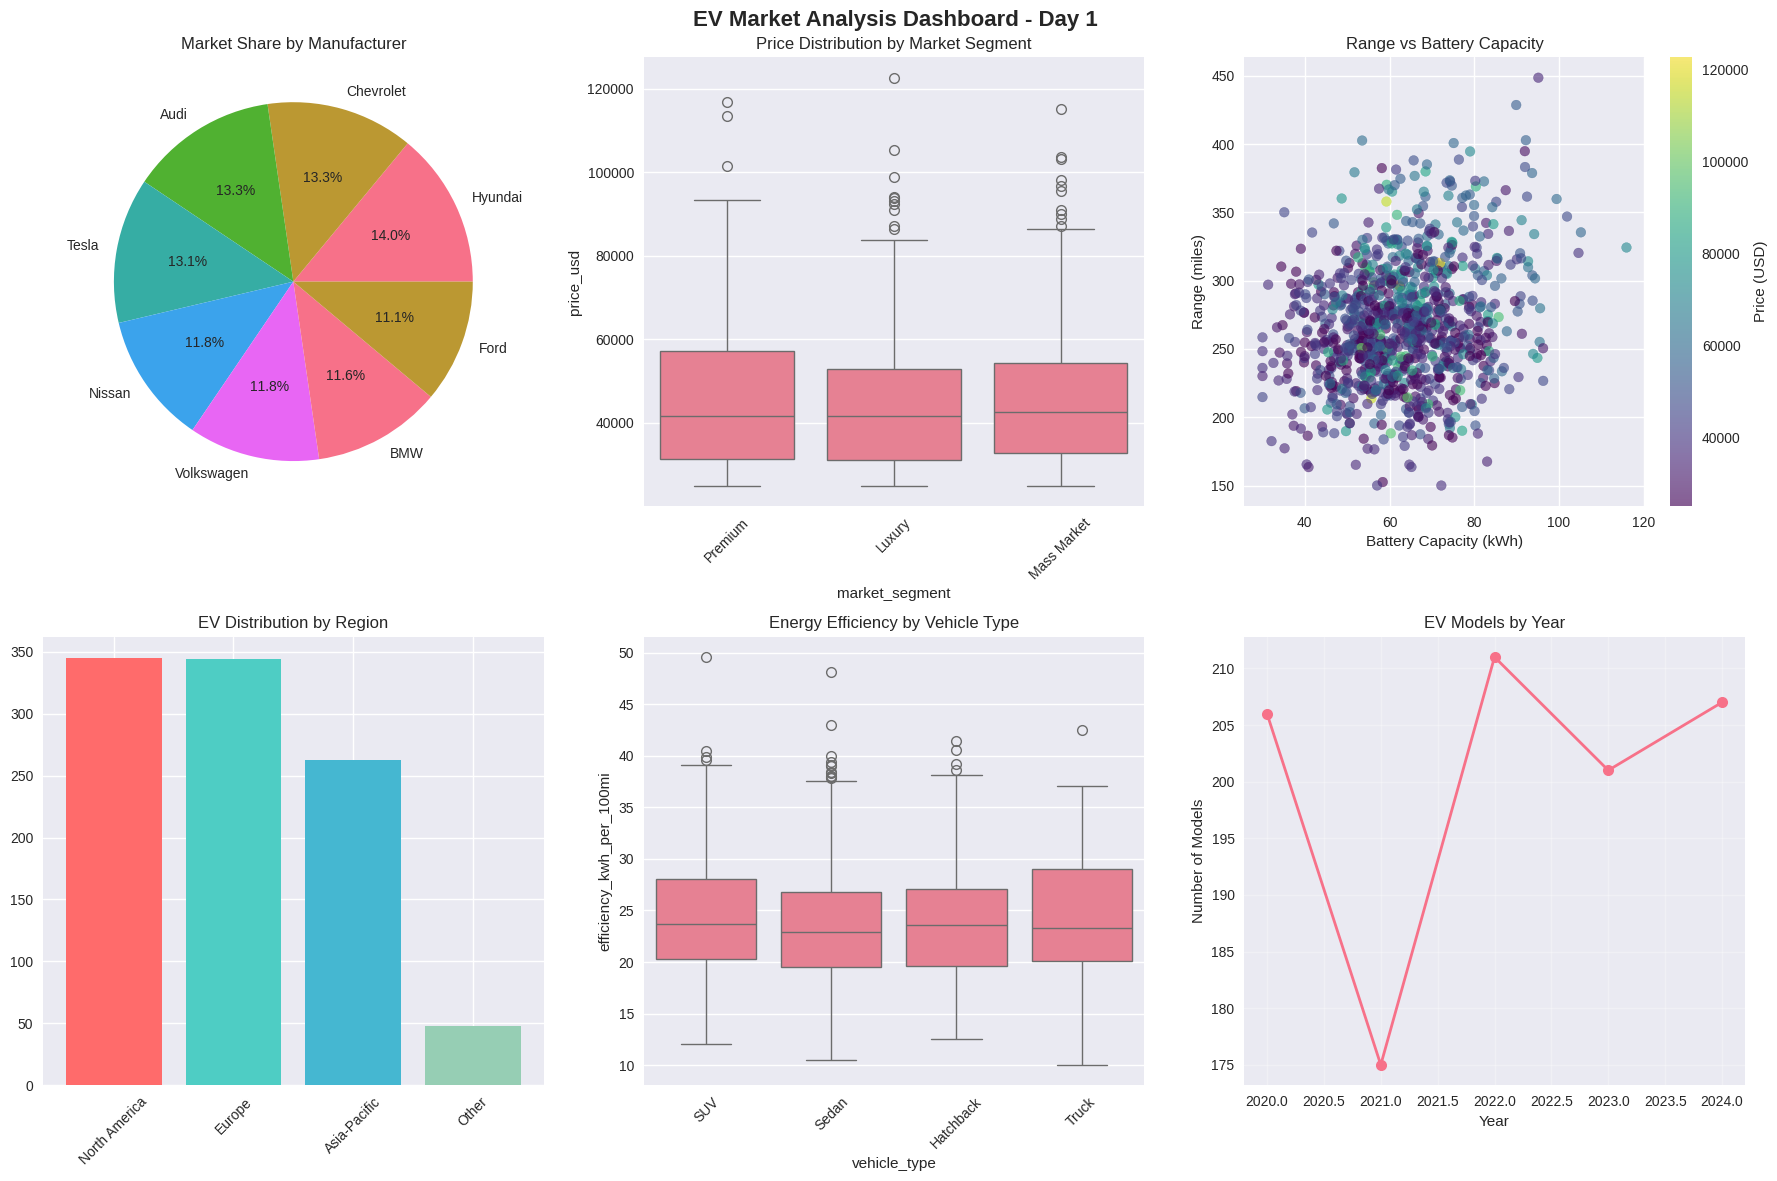

In [88]:
# Create comprehensive visualization dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('EV Market Analysis Dashboard - Day 1', fontsize=16, fontweight='bold')
# 1. Market Share by Manufacturer
manufacturer_counts = ev_data['manufacturer'].value_counts()
axes[0, 0].pie(manufacturer_counts.values, labels=manufacturer_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Market Share by Manufacturer')
# 2. Price Distribution by Segment
sns.boxplot(data=ev_data, x='market_segment', y='price_usd', ax=axes[0, 1])
axes[0, 1].set_title('Price Distribution by Market Segment')
axes[0, 1].tick_params(axis='x', rotation=45)
# 3. Range vs Battery Capacity
scatter = axes[0, 2].scatter(ev_data['battery_capacity_kwh'], ev_data['range_miles'],
                           c=ev_data['price_usd'], cmap='viridis', alpha=0.6)
axes[0, 2].set_xlabel('Battery Capacity (kWh)')
axes[0, 2].set_ylabel('Range (miles)')
axes[0, 2].set_title('Range vs Battery Capacity')
plt.colorbar(scatter, ax=axes[0, 2], label='Price (USD)')
# 4. Regional Distribution
region_counts = ev_data['region'].value_counts()
axes[1, 0].bar(region_counts.index, region_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[1, 0].set_title('EV Distribution by Region')
axes[1, 0].tick_params(axis='x', rotation=45)
# 5. Efficiency by Vehicle Type
sns.boxplot(data=ev_data, x='vehicle_type', y='efficiency_kwh_per_100mi', ax=axes[1, 1])
axes[1, 1].set_title('Energy Efficiency by Vehicle Type')
axes[1, 1].tick_params(axis='x', rotation=45)
# 6. Year-over-Year Trends
yearly_counts = ev_data['year'].value_counts().sort_index()
axes[1, 2].plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2, markersize=8)
axes[1, 2].set_title('EV Models by Year')
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('Number of Models')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [42]:
# ============================================================================
# SECTION 5: KEY INSIGHTS AND METRICS
# ============================================================================

In [99]:
# Calculate key metrics
total_models = len(ev_data)
avg_price = ev_data['price_usd'].mean()
avg_range = ev_data['range_miles'].mean()
avg_battery = ev_data['battery_capacity_kwh'].mean()

In [100]:
print(f"🚗 Total EV Models Analyzed: {total_models}")
print(f"💰 Average Price: ${avg_price:,.0f}")
print(f"🔋 Average Battery Capacity: {avg_battery:.1f} kWh")
print(f"📏 Average Range: {avg_range:.0f} miles")

🚗 Total EV Models Analyzed: 1000
💰 Average Price: $45,507
🔋 Average Battery Capacity: 62.8 kWh
📏 Average Range: 268 miles


In [101]:
# Top performers
print(f"\n🏆 Top Performers:")
print(f"Most Expensive: {ev_data.loc[ev_data['price_usd'].idxmax(), 'manufacturer']} {ev_data.loc[ev_data['price_usd'].idxmax(), 'model']} (${ev_data['price_usd'].max():,.0f})")
print(f"Longest Range: {ev_data.loc[ev_data['range_miles'].idxmax(), 'manufacturer']} {ev_data.loc[ev_data['range_miles'].idxmax(), 'model']} ({ev_data['range_miles'].max():.0f} miles)")
print(f"Largest Battery: {ev_data.loc[ev_data['battery_capacity_kwh'].idxmax(), 'manufacturer']} {ev_data.loc[ev_data['battery_capacity_kwh'].idxmax(), 'model']} ({ev_data['battery_capacity_kwh'].max():.1f} kWh)")


🏆 Top Performers:
Most Expensive: BMW i3 ($122,685)
Longest Range: Tesla Model Y (449 miles)
Largest Battery: Tesla Model Y (116.0 kWh)


In [93]:
# Market segment analysis
print(f"\n📊 Market Segment Analysis:")
segment_analysis = ev_data.groupby('market_segment').agg({
    'price_usd': ['mean', 'count'],
    'range_miles': 'mean',
    'battery_capacity_kwh': 'mean'
}).round(2)


📊 Market Segment Analysis:


In [94]:
print(segment_analysis)

               price_usd       range_miles battery_capacity_kwh
                    mean count        mean                 mean
market_segment                                                 
Luxury          44642.66   323      265.13                62.73
Mass Market     45634.17   299      269.62                62.23
Premium         46145.60   378      268.19                63.38


# ============================================================================
# SECTION 6: CORRELATION ANALYSIS
# ============================================================================

In [102]:
# Select numeric columns for correlation
numeric_cols = ['battery_capacity_kwh', 'price_usd', 'range_miles', 'charging_speed_kw',
                'efficiency_kwh_per_100mi', 'price_per_mile_range']

In [103]:
correlation_matrix = ev_data[numeric_cols].corr()

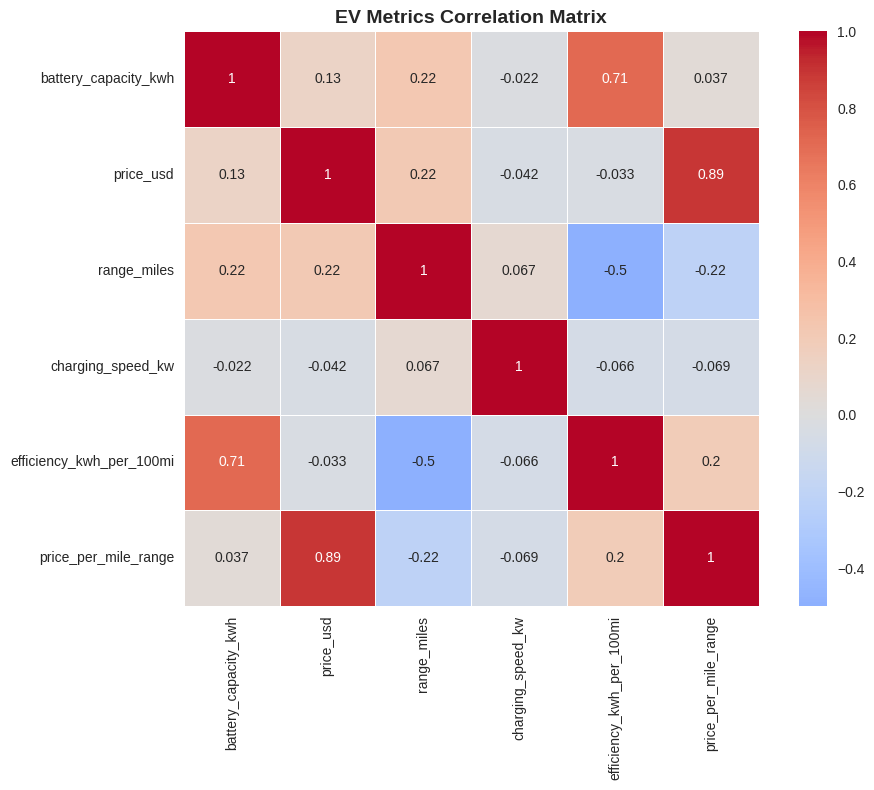

In [104]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('EV Metrics Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [53]:
# Key correlations
print("🔍 Key Correlations:")
print(f"Price vs Range: {correlation_matrix.loc['price_usd', 'range_miles']:.3f}")
print(f"Price vs Battery: {correlation_matrix.loc['price_usd', 'battery_capacity_kwh']:.3f}")
print(f"Range vs Battery: {correlation_matrix.loc['range_miles', 'battery_capacity_kwh']:.3f}")

🔍 Key Correlations:
Price vs Range: 0.216
Price vs Battery: 0.127
Range vs Battery: 0.223


# ============================================================================
# SECTION 7: DATA EXPORT AND SUMMARY
# ============================================================================

In [55]:
# Save processed data
ev_data.to_csv('ev_market_data_day1.csv', index=False)
print("✅ Data exported to 'ev_market_data_day1.csv'")

✅ Data exported to 'ev_market_data_day1.csv'


In [56]:
# Create summary report
summary_report = {
    'analysis_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'total_records': len(ev_data),
    'manufacturers': len(ev_data['manufacturer'].unique()),
    'date_range': f"{ev_data['year'].min()}-{ev_data['year'].max()}",
    'price_range': f"${ev_data['price_usd'].min():,.0f} - ${ev_data['price_usd'].max():,.0f}",
    'range_span': f"{ev_data['range_miles'].min():.0f} - {ev_data['range_miles'].max():.0f} miles",
    'top_manufacturer': ev_data['manufacturer'].value_counts().index[0],
    'avg_efficiency': f"{ev_data['efficiency_kwh_per_100mi'].mean():.2f} kWh/100mi"
}

In [57]:
print("\n📋 Analysis Summary:")
for key, value in summary_report.items():
    print(f"{key.replace('_', ' ').title()}: {value}")


📋 Analysis Summary:
Analysis Date: 2025-06-30 06:44:57
Total Records: 1000
Manufacturers: 8
Date Range: 2020-2024
Price Range: $25,000 - $122,685
Range Span: 150 - 449 miles
Top Manufacturer: Hyundai
Avg Efficiency: 23.97 kWh/100mi
